<a href="https://colab.research.google.com/github/sravani2262/ImageClassificationPro/blob/main/ImageClasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow keras numpy pandas matplotlib scikit-learn opencv-python


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
import os


In [2]:
from google.colab import files

# Upload your dataset file
uploaded = files.upload()


Saving MNIST.zip to MNIST.zip


In [3]:
!unzip MNIST.zip

Archive:  MNIST.zip
  inflating: t10k-images-idx3-ubyte/t10k-images-idx3-ubyte  
  inflating: t10k-images.idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte  
  inflating: t10k-labels.idx1-ubyte  
  inflating: train-images-idx3-ubyte/train-images-idx3-ubyte  
  inflating: train-images.idx3-ubyte  
  inflating: train-labels-idx1-ubyte/train-labels-idx1-ubyte  
  inflating: train-labels.idx1-ubyte  


In [4]:
# Example: Load and preprocess the MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the images
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


11490434/11490434 [==============================] - 0s 0us/step


In [5]:
# Example: Build a simple CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [6]:
# Example: Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_test, y_test))


Epoch 1/10
469/469 [==============================] - 60s 125ms/step - loss: 0.3031 - accuracy: 0.9072 - val_loss: 0.0719 - val_accuracy: 0.9773
Epoch 2/10
469/469 [==============================] - 51s 109ms/step - loss: 0.0999 - accuracy: 0.9707 - val_loss: 0.0479 - val_accuracy: 0.9841
Epoch 3/10
469/469 [==============================] - 52s 110ms/step - loss: 0.0706 - accuracy: 0.9791 - val_loss: 0.0385 - val_accuracy: 0.9863
Epoch 4/10
469/469 [==============================] - 56s 120ms/step - loss: 0.0589 - accuracy: 0.9821 - val_loss: 0.0301 - val_accuracy: 0.9894
Epoch 5/10
469/469 [==============================] - 55s 118ms/step - loss: 0.0488 - accuracy: 0.9856 - val_loss: 0.0348 - val_accuracy: 0.9890
Epoch 6/10
469/469 [==============================] - 55s 118ms/step - loss: 0.0419 - accuracy: 0.9876 - val_loss: 0.0241 - val_accuracy: 0.9916
Epoch 7/10
469/469 [==============================] - 51s 109ms/step - loss: 0.0369 - accuracy: 0.9888 - val_loss: 0.0246 - val_ac

In [7]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 3s - loss: 0.0235 - accuracy: 0.9925 - 3s/epoch - 10ms/step

Test accuracy: 0.9925000071525574


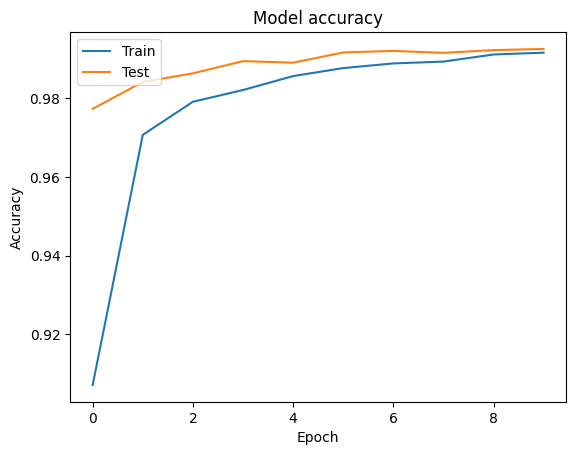

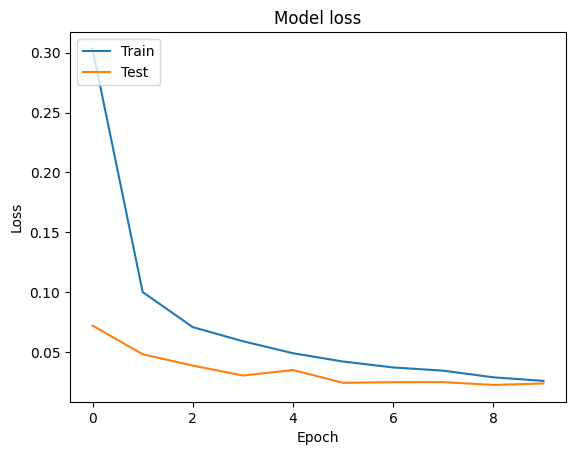

In [8]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


1/1 [==============================] - 0s 47ms/step


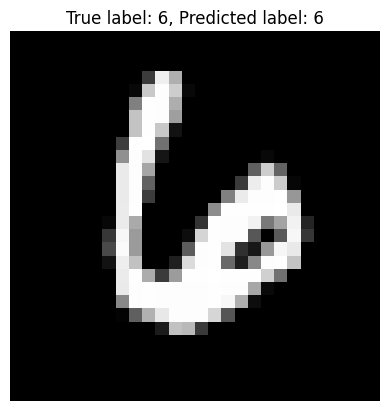

In [11]:
# Select a random image from the test set
index = np.random.randint(0, len(x_test))
img = x_test[index]
true_label = np.argmax(y_test[index])

# Reshape the image to match the model input shape
img = np.expand_dims(img, axis=0)

# Predict the label of the image
predictions = model.predict(img)
predicted_label = np.argmax(predictions)

# Plot the image and its predicted label
plt.imshow(np.squeeze(x_test[index]), cmap='gray')
plt.title(f"True label: {true_label}, Predicted label: {predicted_label}")
plt.axis('off')
plt.show()


In [12]:
# Save the entire model to a HDF5 file
model.save('mnist_cnn_model.h5')

# To load the model, you can use:
# loaded_model = keras.models.load_model('mnist_cnn_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 4s 12ms/step


<Figure size 800x600 with 0 Axes>

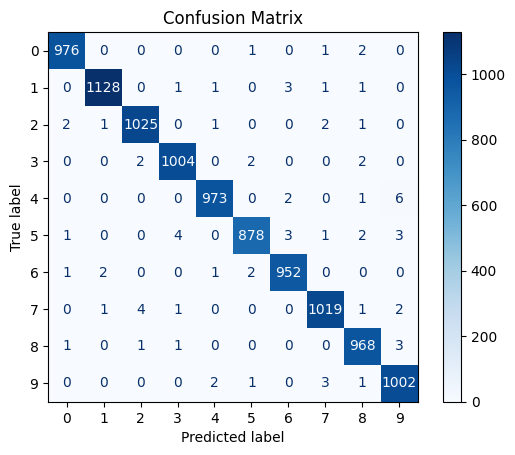

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict classes for test set
y_pred = np.argmax(model.predict(x_test), axis=1)

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(cm, display_labels=np.arange(10)).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [16]:
from sklearn.metrics import classification_report

# Predict classes for test set
y_pred = np.argmax(model.predict(x_test), axis=1)

# Generate classification report
class_names = np.arange(10).astype(str)
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=class_names))


313/313 [==============================] - 4s 13ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 800x600 with 0 Axes>

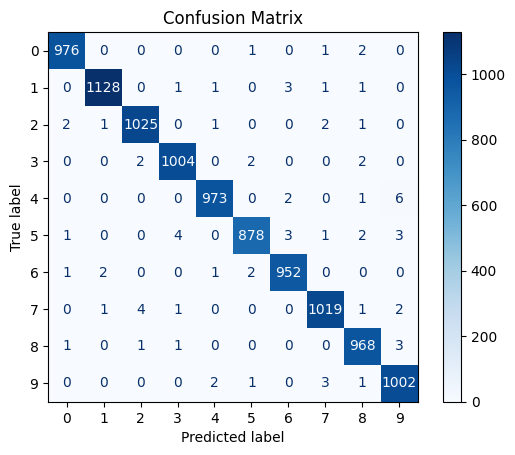

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(cm, display_labels=class_names).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


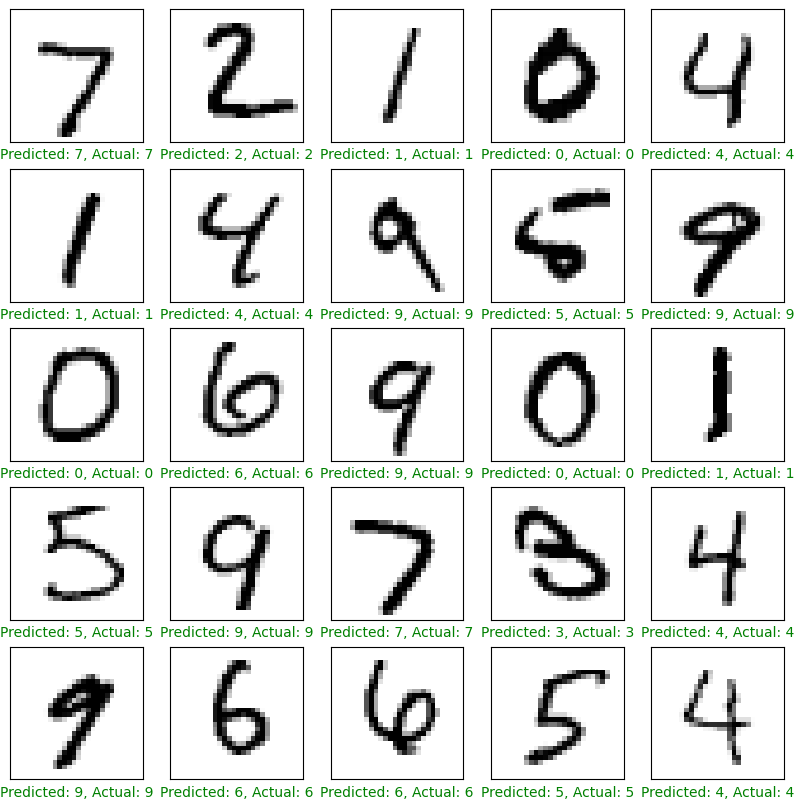

In [18]:
# Visualize some predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]), cmap=plt.cm.binary)
    predicted_label = y_pred[i]
    true_label = np.argmax(y_test[i])
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'Predicted: {predicted_label}, Actual: {true_label}', color=color)
plt.show()
